In [7]:
import pandas as pd
from project import paths
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_pickle(paths['processed'] / 'data.pkl')
data.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran,veterans benefits,weeks worked in year,year,TARGET
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [11]:
target_map = {' - 50000.':0, ' 50000+.':1}

data['TARGET'] = data['TARGET'].map(target_map)

In [16]:
data.select_dtypes(include=['number']).columns

Index(['age', 'wage per hour', 'capital gains', 'capital losses',
       'dividends from stocks', 'instance weight',
       'num persons worked for employer', 'weeks worked in year', 'year',
       'TARGET'],
      dtype='object')

In [52]:
from scipy.stats import pointbiserialr

# Assuming 'data' is your DataFrame

# 1. Extract only the numeric variables (excluding the target variable)
numeric_columns = data.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop('TARGET', errors='ignore')  # Exclude 'TARGET'
numeric_data = data[numeric_columns]

# 2. Calculate the point-biserial correlation for all numeric variables with the 'TARGET'
correlations = {}
for col in numeric_data.columns:
    correlation, _ = pointbiserialr(data[col], data['TARGET'])
    correlations[col] = abs(correlation)  # Take the absolute value of correlation

# 3. Sort the correlations by absolute value to find the strongest relationships
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)

# 4. Extract the top 5 strongest correlations
top_5_correlations = sorted_correlations[:5]

# 5. Output the top 5 strongest correlations
print("Top 5 Strongest Relationships with TARGET Variable:")
for feature, corr_value in top_5_correlations:
    print(f"{feature}: {corr_value:.4f}")


Top 5 Strongest Relationships with TARGET Variable:
weeks worked in year: 0.2622
capital gains: 0.2404
num persons worked for employer: 0.2241
dividends from stocks: 0.1785
capital losses: 0.1474


In [18]:
# 1. Extract only the numeric variables (excluding the target variable)
numeric_columns = data.select_dtypes(include=['number']).columns
#numeric_columns.pop("TARGET")
numeric_data = data[numeric_columns]

# 2. Calculate the correlation matrix for all numeric variables
correlation_matrix = numeric_data.corr()

# 3. Get the correlations of all numeric variables with the 'TARGET' variable
target_correlation = correlation_matrix['TARGET'].drop('TARGET', axis=0)  # Drop 'TARGET' from its own correlation

# 4. Sort the correlations by absolute value to find the strongest relationships
sorted_correlation = target_correlation.abs().sort_values(ascending=False)

# 5. Extract the top 5 strongest correlations
top_5_correlations = sorted_correlation.head(5)

# Output the top 5 strongest correlations
print("Top 5 Strongest Relationships with TARGET Variable:")
print(top_5_correlations)

Top 5 Strongest Relationships with TARGET Variable:
weeks worked in year               0.262229
capital gains                      0.240382
num persons worked for employer    0.224148
dividends from stocks              0.178462
capital losses                     0.147448
Name: TARGET, dtype: float64


### Weeks worked in a year

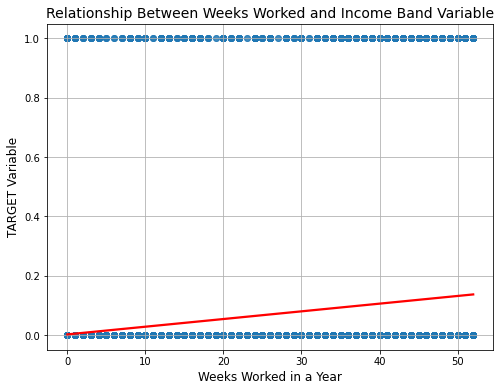

In [44]:
# Calculate the correlation between 'weeks worked in year' and 'TARGET'
correlation = data['weeks worked in year'].corr(data['TARGET'])

# Create the plot
plt.figure(figsize=(8, 6))
sns.regplot(x='weeks worked in year', y='TARGET', data=data, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})

# Set the title and labels
plt.title('Relationship Between Weeks Worked and Income Band Variable', fontsize=14)
plt.xlabel('Weeks Worked in a Year', fontsize=12)
plt.ylabel('TARGET Variable', fontsize=12)

# Show grid
plt.grid(True)

# Show the plot
plt.show()

### Occupation

<Figure size 864x576 with 0 Axes>

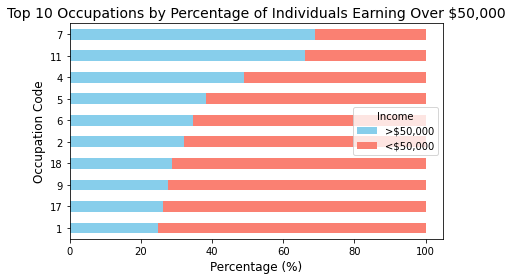

In [39]:
# Calculate the percentage of TARGET for each category in 'detailed occupation recode'
occupation_target_pct = data.groupby(['detailed occupation recode', 'TARGET']).size().unstack(fill_value=0)

# Calculate the percentage by dividing each count by the total number of each 'detailed occupation recode' category
occupation_target_pct = occupation_target_pct.div(occupation_target_pct.sum(axis=1), axis=0) * 100

# Add the percentage for TARGET = 1 to the DataFrame for easy sorting
occupation_target_pct['TARGET_1_pct'] = occupation_target_pct[1]

# Sort by the percentage of TARGET = 1 in descending order and take the top 10
top_10_occupation = occupation_target_pct.sort_values('TARGET_1_pct', ascending=False).head(10)

top_10_occupation.rename(columns = {1:'>$50,000', 0:'<$50,000'}, inplace = True)

# Plot the horizontal stacked bar chart
plt.figure(figsize=(12, 8))
top_10_occupation[['>$50,000','<$50,000']].iloc[::-1].plot(kind='barh', stacked=True, color=['skyblue', 'salmon'])

# Set the title and labels
plt.title("Top 10 Occupations by Percentage of Individuals Earning Over $50,000", fontsize=14)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Occupation Code', fontsize=12)
plt.legend(title = 'Income')

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 1440x576 with 0 Axes>

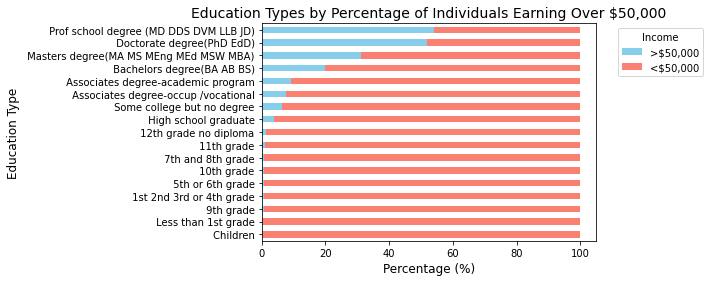

In [51]:
# Calculate the percentage of TARGET for each category in 'education'
education_target_pct = data.groupby(['education', 'TARGET']).size().unstack(fill_value=0)

# Calculate the percentage by dividing each count by the total number of each 'education' category
education_target_pct = education_target_pct.div(education_target_pct.sum(axis=1), axis=0) * 100

# Add the percentage for TARGET = 1 to the DataFrame for easy sorting
education_target_pct['TARGET_1_pct'] = education_target_pct[1]

# Sort by the percentage of TARGET = 1 in descending order and take the top 10
top_10_education = education_target_pct.sort_values('TARGET_1_pct', ascending=False).head(20)

top_10_education.rename(columns = {1:'>$50,000', 0:'<$50,000'}, inplace = True)

# Plot the horizontal stacked bar chart
plt.figure(figsize=(20, 8))
top_10_education[['>$50,000','<$50,000']].iloc[::-1].plot(kind='barh', stacked=True, color=['skyblue', 'salmon'])

# Set the title and labels
plt.title("Education Types by Percentage of Individuals Earning Over $50,000", fontsize=14)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Education Type', fontsize=12)
plt.legend(title = 'Income', loc='upper left', bbox_to_anchor=(1.05, 1))

# Show the plot
#plt.tight_layout()
plt.show()